Refer to the instructions on Canvas for more information.

"I have neither given nor received help on this assignment."

author: Rohan Ravulapalli

### API #1

- **URL:** https://covidtracking.com/data/api/version-2
- **Name:** Covid Tracking Project
- **Research Question:** What was the overall trend of total confirmed COVID cases in Virginia during the first two years of the Pandemic (2020-2021)?
  
- **Solution Discussion:**

    The API from the Covid Tracking Project, titled in GitHub, provided access to various different API links. One particular link
    included a dataset comprising of state-specific COVID data overtime, with attributes including, but not limited to, confirmed
    cases, probable cases, confirmed deaths and test results  of Virginia, relating to the Coronavirus pandemic from January 27th, 2020 to
    March 7th, 2021. The dataset initially consisted of 406 data points for each date, but after removal of rows with missing values, the data
    consisted of 321 data points relating to the number of confirmed COVID cases reported for each date between April 21st, 2020 to March 7th, 2021.
    
    The line graph below is a result of graphing all 321 complete data points from the dataset by setting the number of confirmed case values to            the y-axis, and setting the corresponding reported dates for each value to the x-axis. **The line graph depicted an overall increase in the number of confirmed covid cases from 2020 to 2021.**

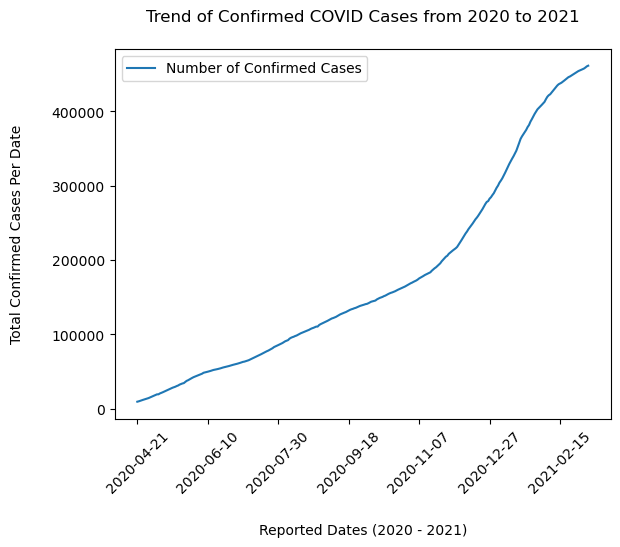

In [206]:
import requests

from pprint import pprint

import matplotlib.pyplot as plt

import pandas as pd

response = requests.get('https://api.covidtracking.com/v2/states/va/daily.json') # obtaining the covid tracking data for virginia.

response.status_code # Ensuring that the request was successful by seeing the status code.

covid_data = response.json() # converting the JSON data to Python

covid_data = covid_data['data'] # list of dictonaries

confirmed_cases = [] # initializing a list for all total confirmed cases for each reported date
dates = [] # initializing the list of all dates

for diction in covid_data: # covid_data is a list of dictionaries
    
    confirmed_cases.append(diction['cases']['confirmed']['value']) # appending all confirmed case values
    dates.append(diction['date']) # appending all corresponding dates for each confirmed case value

df = pd.DataFrame({'Number of Confirmed Cases': confirmed_cases, 'Date': dates})  # creating a dataFrame comprising of two columns: cases and date.

df = df.dropna() # Removing all rows with missing values so that we do not end up with an incomplete graph

df = df.iloc[::-1] # The dates were appended from latest to oldest, hence, we must reverse the dataframe in order to ensure accurate value-date pairs.

df.plot('Date', 'Number of Confirmed Cases'), plt.xticks(rotation=45) # Plotting a line chart with the x-axis involving the date values
#                                                                       and y-axis including the confirmed case values for each date

# appropriately positioning and labeling chart axes and title:

ax = plt.gca()

ax.set_ylabel('Total Confirmed Cases Per Date', labelpad=20)

ax.set_xlabel('Reported Dates (2020 - 2021)', labelpad=20)

ax.set_title('Trend of Confirmed COVID Cases from 2020 to 2021', pad=20)

plt.show()

### API #2

- **URL:** https://www.hpb.health.gov.lk/en/api-documentation
- **Name:** COVID-19 Tracker Sri Lanka
- **Research Question:** The COVID Antigen and PCR (Polymerase chain reaction) tests were prominent COVID tests used for COVID diagnosis during the pandemic spanning from 2020 to 2022. What is the relationship between positive Antigen test counts of COVID and positive PCR test counts of COVID of the population of Sri Lanka from 2020 to 2022? Specifically, were the daily recorded counts of both tests correlated over the timeframe from February 18th, 2020 to
June 15th, 2022 for Sri Lanka?
  
- **Solution Discussion:**

    The API I used, COVID-19 Tracker Sri Lanks, included a list of dictonaries that included all daily test counts for Antigen
    COVID tests and PCR COVID tests between February 18th, 2020 and June 15th, 2022 for Sri Lanka. The scatter plot below is the result of
    plotting the test counts for each of the two tests against each other. Admittedly, the Antigen test count data was quite
    concerning due to the large amount ofcinsecutive zero's given for the antigen test count records from February 2020 to June 2021, raising concerns
    about the validity of the dataset.
  
    To accomodate for both scenarios, where the 380 consecutive zeros for the antigen test records were included, versus a scenario where the consecutive zeros were not included, two scatterplots were initialized.
    Both scatterplots depict a weak positive correlation between Antigen test counts and PCR test counts, indicating that both tests seem to cover
    a similar trend regarding the change in positive COVID cases from 2020 to 2022 for Sri Lanka.


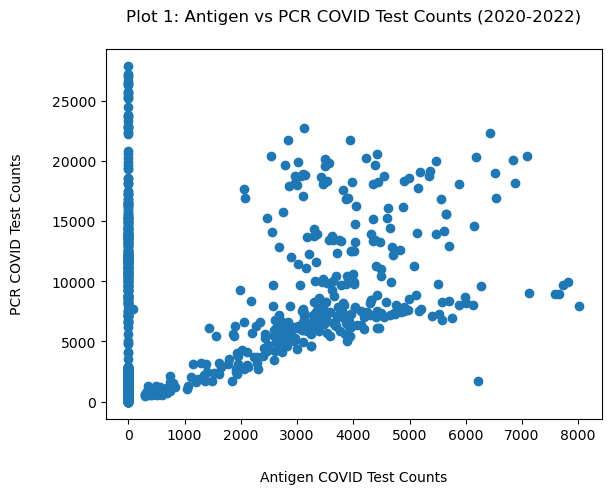

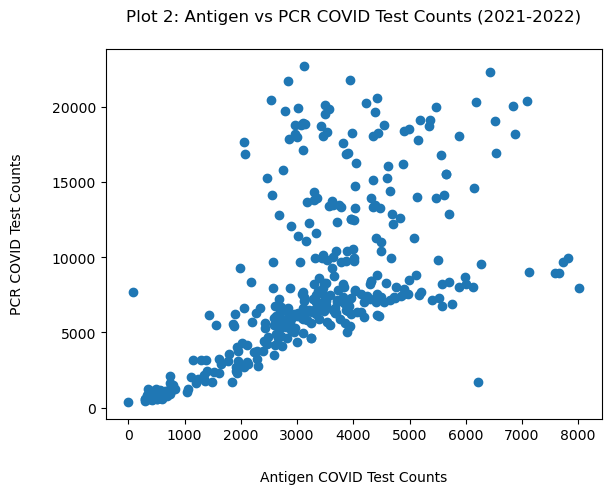

In [244]:
response = requests.get('https://www.hpb.health.gov.lk/api/get-current-statistical') # Retrieving all Sri Lanka COVID related data from 2020 to 2022

Dat_Sri_Lanka = response.json()['data']

Antigen_count = []

pcr_count = []

for diction in Dat_Sri_Lanka['daily_antigen_testing_data']:
    
    Antigen_count.append(int(diction['antigen_count'])) # recording all daily Antigen test counts from 2020 February to 2022 June

for diction in Dat_Sri_Lanka['daily_pcr_testing_data']:
    
    pcr_count.append(int(diction['pcr_count'])) # recording all daily PCR test counts from 2020 February to 2022 June


# PLOT 1 (WITH CONSECUTIVE ZERO VALUES IN ANTIGENT DATASET)

plt.scatter(Antigen_count, pcr_count) # creating a scatter plot of the Antigen Counts versus the PCR counts.

ax = plt.gca()

ax.set_xlabel('Antigen COVID Test Counts', labelpad=20)

ax.set_ylabel('PCR COVID Test Counts', labelpad=20)

ax.set_title('Plot 1: Antigen vs PCR COVID Test Counts (2020-2022)', pad=20)

plt.show()

# It appears that the Antigen COVID test count data contains a significant consecutive missing daily values, as indicated by the first plot.
# It is a good idea to measure the relationship without the consecutive zeros. Although zeros are normal, having a long consecutive streak
# of zeros for counts of vaccinations raises concerns.

Antigen_count[381:] # After indexing, it appears that from index 381 till the end, the Antigen test records contain consecutive zeros
'''
[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
............................
........0, 0, 0, 0]

Here are the consecutive string of days where there seems to be a zero for the antigen test counts.
'''
Modified_Antigen_count = Antigen_count[0:381] # Creating a modified Antigen count list for an alternative comparison.
                                              # The Antigen test counts were given in descending order in terms of date in the Sri Lanka COVID dataset,
                                              # meaning this modified Antigen count list removes the first 380 daily records of the original Antigen
                                              # count list.
        
Modified_PCR_count = pcr_count[0:381] # Since we are aiming to assess the relationship between Antigen and PCR reports for COVID in Sri Lanka, it is
                                      # important to have a roughly equal sample size for comparison. The PCR dataset, although does not contain a 
                                      # string of consecutive zero values, should be modified for accuracy of the relaionship.



# PLOT 2 (MODIFIED ANTIGEN AND PCR DATASETS)


plt.scatter(Modified_Antigen_count, Modified_PCR_count) # creating a scatter plot of the Antigen Counts versus the PCR counts.

ax = plt.gca()

ax.set_xlabel('Antigen COVID Test Counts', labelpad=20)

ax.set_ylabel('PCR COVID Test Counts', labelpad=20)

ax.set_title('Plot 2: Antigen vs PCR COVID Test Counts (2021-2022)', pad=20) # After removal of the first 380 days, we unfortuntely have to add a year,
                                                                              # meaning that the second plot features the records of both test counts
                                                                              # from 2021 to 2022, rather than 2020 to 2022

plt.show()


### API #3

- **URL:**: https://www.fruityvice.com/
- **Name**: Fruityvice
- **Research Question**: How does the Citrus fruit genus compare with the Prunus fruit genus in terms of average carb to calorie ratio of all of their  individual fruits listed in the Fruityvice database?

   
- **Solution Discussion**:

    The Fruityvice API offered a dataset containing nutritional information of all fruits, such as their carb, protein and caloric content, as well as the familial and genus information of each
    fruit. In order to answer the question, I queried the dataset by calculating each carb to calorie ratio of all fruits belonging to both the
    Citrus fruit genus and Prunus fruit genus. After calculations, the means of all the ratios appended of both groups were calculated.
    
    It was apparent that although the mean ratios for both genera were roughly equal, it was apparent that the Citrus fruit genus contained more
    available fruits in the data set compared to the Prunus fruit, hence, in order to acquire a more in-depth comparison of the means between the two
    groups, a two-sample t-test was performed using the scipy library.
    
    The test statistic and p-values from the t-test were calculated to be 0.2648 and 0.7988 respectively, indicating that the null hypothesis that
    both means were not statistically different, should not be rejected.
    
    Hence, from the conclusions of the t-test, the average carb to calorie ratios of the Prunus fruit genus and the Citrus fruit genus are roughly equal.

In [214]:
import statistics
import numpy as np
from scipy import stats

response = requests.get('https://www.fruityvice.com/api/fruit/all')

fruit_data = response.json() # list of dictionaries where each dictionary contains the fruit name and its nuritional info

Citrus = []

Prunus = []

for i in range(len(fruit_data)):
    if fruit_data[i]['genus']=='Citrus':
        Citrus.append(fruit_data[i]['nutritions']['carbohydrates']/fruit_data[i]['nutritions']['calories']) # Appending the carb-calorie ratios for each
                                                                                                            # citrus fruit
    if fruit_data[i]['genus']=='Prunus':
        Prunus.append(fruit_data[i]['nutritions']['carbohydrates']/fruit_data[i]['nutritions']['calories']) # Appending the carb-calorie ratios for each
                                                                                                            # prunus fruit

# Calculating the average ratio of both fruit families

mean_citrus = statistics.mean(Citrus) # -> 0.25703277583919126
mean_prunus = statistics.mean(Prunus) # -> 0.24785395763656634


# It turns out that the fruit lists are not equal in terms of size. The Citrus fruit family contains more fruit in the provided dataset than the
# Prunus dataset.
len(Citrus)
len(Prunus)

'''
In order to ensure accurate comparisons between the averages (means) of the two groups, we must perform a T-TEST.

A t-test is a statistical hypothesis test used for concluding whether there is a statistically significant difference between the means of 
two variables.

In this scenario, we should use a two-sample T-Test.


HYPOTHESES

H0: There is not a statistically significant difference between the mean carb to calorie ratios of the two fruit groups

H1: There is a statistically significant difference between the mean carb to calorie ratios of the two fruit groups
'''

# T-TEST:

# Using standard lists for t-tests in the scipy library can lead to errors, so let's convert them to numpy arrays
Citrus = np.array(Citrus)
Prunus = np.array(Prunus)

# Measuring the variance ratio amongst the two groups:

Var1 = np.var(Citrus)

Var2 = np.var(Prunus)

Var2/Var1 # -> The ratio of the variances is less than 4:1

T_Stat, p = stats.ttest_ind(a=Citrus, b= Prunus, equal_var=True) # Calculating the test statistic and p-value

print(T_Stat) # -> 0.2648

print(p) # -> 0.7987

Null_Hypothesis = p > 0.05

print(Null_Hypothesis) # -> True. 

'''
Since the P-value is greater than 0.05, we FAIL to reject the null hypothesis. There is not a significant difference between the average
carb to calorie ratio of Citrus fruits versus Prunus fruits. 
'''

0.2648018888182301
0.7987899667219442
True


'\nSince the P-value is greater than 0.05, we FAIL to reject the null hypothesis. There is not a significant difference between the average\ncarb to calorie ratio of Citrus fruits versus Prunus fruits. \n'

### API #4


- **URL:** https://disease.sh/
- **Name:** Open Disease
- **Research Question:** What is the overall trend in the daily number of COVID Vaccinations given in the U.S. from 2022 to 2024? This can illustrate to us how the urgency of
                     getting vaccinated has changed over recent years following the pandemic.
                      
- **Solution Discussion:**

    The Open Disease API provided various different API datasets. One of the datasets included daily vaccination coverage in all
    countries, from the dates that the user specifies up until the most recent day the vaccination coverage data was updated.
    In my case, since I wished to query the data starting from Jan 1st, 2022 to April 21st, 2024 (one day prior to today),
    I queried the API dataset URL by fetching the last 842 days, which successfully appended all vaccination coverage data
    since Jan 1st, 2022.
    
    
    The line graph below was made by filtering the loaded JSON data for daily vaccination coverage data that only pertained to the USA. The coverage data was a list of dictonaries that
    included a dictionary possessing all date and vaccination count values as key-value pairs (i.e '1/2/2022':111230303, where the value is the
    recorded vaccination count for that particular day). It should be noted that the y-axis values for the line graph are in terms of hundred millions,
    as labeled, meaning 6.8 would translate to six hundred million, eight hundred thousand vaccination counts.
    
    Based on the line graph below, it seems that daily vaccination counts in the USA were steadily increasing starting from the beginning of 2022 to
    early 2023, before fully leveling off starting from the middle of 2023 to present day, April 2024.

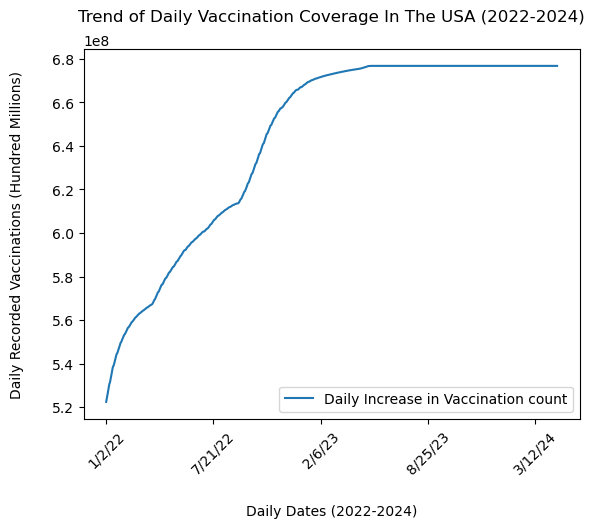

In [223]:
response = requests.get('https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=842') # Specifying 842 allows us to retrieve all 
                                                                                                  # COVID vaccination coverage data since Jan 1st, 2022

USA_data = response.json()

Date_Vals = dict() # this dictionary will comprise of all the date and vaccination number key-value pairs for the USA.

for diction in USA_data:
    if diction['country'] == 'USA':
        for date in diction['timeline']:
            Date_Vals[date] = diction['timeline'][date]

    
df = pd.DataFrame({'Daily Increase in Vaccination count': Date_Vals.values(), 'Date':Date_Vals.keys()})

# Plotting line graph:

df.plot('Date', 'Daily Increase in Vaccination count'), plt.xticks(rotation=45) # creating a line graph where the date values will fill the x-axis, and
#                                                                           the y-axis will be labeled with the vaccination count values in 
#                                                                           hundred millions.

ax = plt.gca()

ax.set_ylabel('Daily Recorded Vaccinations (Hundred Millions)', labelpad=20)

ax.set_xlabel('Daily Dates (2022-2024)', labelpad=20)

ax.set_title('Trend of Daily Vaccination Coverage In The USA (2022-2024)', pad=20)

plt.show()

### API #5


- **URL:** https://api.covid19tracker.ca/docs/1.0/overview
- **Name:** COVID-19 Tracker Canada
- **Research Question:** What is the overall trend in Canada, of those that are aged 80+, that fall under the category of recieving at least one vaccination, over the course of 2021 to 2022?
- **Solution Discussion:**
    
    The COVID-19 Tracker for Canada provided a comprehensive coverage for Vaccination coverage of Canadians over the couse of the pandemic.
    The provided URL of the API contained various different filters for the main API dataset, including age grouping data for
    COVID vaccination coverage, such as the number of individuals of each group who received at least on Vaccination, received
    partial diagnosis, and full diagnosis. The dataset that filtered for age groups contained around 59 data points, each of which
    represented 59 different dates recorded from December 2020 to January 2022.
    
    The line graph below was created by querying the data for results regarding the values for canadians that fall under the age group of 80 and
    over, and have received at least one vaccination. The dates for each value were also recorded in order to initialize the history for the line
    graph. The Y-axis depicts the number of individuals, who received at least one vaccination, in millions. The X-axis represents the corresponding recorded dates for each value
    
    The line graph indicates that the number of 80+ year old canadian individuals, who received at least one vaccination, steadily increased from late 2020 to mid-year 2021, before leveling off till early-year 2022.

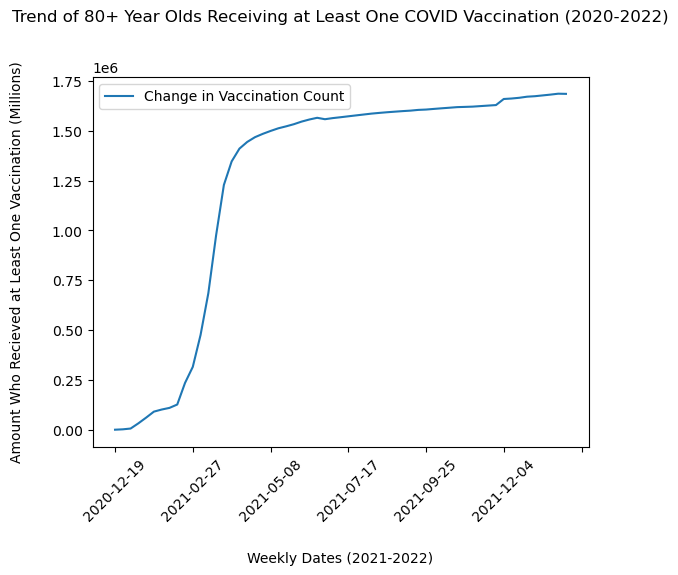

In [224]:
import json

response = requests.get('https://api.covid19tracker.ca/vaccines/age-groups')

age_data = response.json()['data']

for i in range(len(age_data)):
    age_data[i]['data'] = json.loads(age_data[i]['data']) # converting all JSON dictionary strings to python dictonaries

age_80_vals = [] # list of values where each value indicates the number of individuals in the 80+ group who fall under the category of having received
                # at least one vaccine for each recorded date in the dataset

dates = [] # Corresponding recorded dates for each value in age_80_vals

for diction in age_data:
    age_80_vals.append(diction['data']['80+']['atleast1'])
    dates.append(diction['date'])

df = pd.DataFrame({'Change in Vaccination Count': age_80_vals, 'Date': dates})

# Plotting line graph:

df.plot('Date', 'Change in Vaccination Count'), plt.xticks(rotation=45) 

ax = plt.gca()

ax.set_ylabel('Amount Who Recieved at Least One Vaccination (Millions)', labelpad=20) # y-axis will include the values for the 80+ group for each date

ax.set_xlabel('Weekly Dates (2021-2022)', labelpad=20) # x-axis will include the corresponding dates for each value

ax.set_title('Trend of 80+ Year Olds Receiving at Least One COVID Vaccination (2020-2022)', pad=40)

plt.show()